In [1]:
import sys
sys.path.append('./../../')

import sim.propagate as prop
import torch
import matplotlib.pyplot as plt


tensor([[ 6.3356e+24+3.3688e+20j, -6.3690e+24-5.5078e+23j,
          6.4696e+24+1.1017e+24j,  ...,
         -6.6386e+24+1.6529e+24j,  6.4696e+24-1.1010e+24j,
         -6.3689e+24+5.5011e+23j],
        [-6.3690e+24-5.5076e+23j,  6.4248e+24+1.1004e+24j,
         -6.5479e+24-1.6497e+24j,  ...,
          6.6048e+24-1.1049e+24j, -6.4581e+24+5.5143e+23j,
          6.3800e+24+3.0585e+20j],
        [ 6.4696e+24+1.1017e+24j, -6.5479e+24-1.6497e+24j,
          6.6935e+24+2.1966e+24j,  ...,
         -6.6382e+24+5.5403e+23j,  6.5140e+24+2.9374e+20j,
         -6.4582e+24-5.5203e+23j],
        ...,
        [-6.6387e+24+1.6528e+24j,  6.6048e+24-1.1048e+24j,
         -6.6382e+24+5.5393e+23j,  ...,
          7.1446e+24-3.2840e+24j, -6.9077e+24+2.7420e+24j,
          6.7395e+24-2.1984e+24j],
        [ 6.4696e+24-1.1010e+24j, -6.4581e+24+5.5135e+23j,
          6.5140e+24+3.8882e+20j,  ...,
         -6.9077e+24+2.7420e+24j,  6.6935e+24-2.1959e+24j,
         -6.5479e+24+1.6490e+24j],
        [-6.3689e+24+5

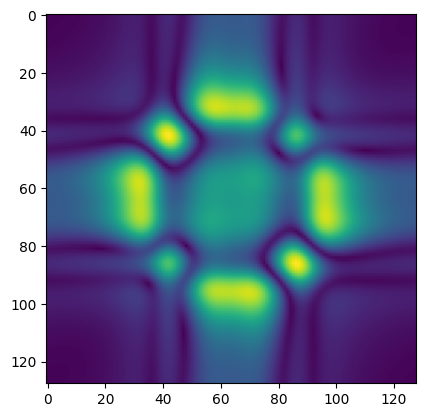

In [9]:
X = torch.arange(-64, 64) ** 2 + torch.arange(-64, 64).unsqueeze(-1) ** 2
X[X < 1000] = 0


# preprocess
def get_show_mat(X):
    X = X.abs().cpu().numpy()
    return X / X.max()

X = X.cuda()
X = X / X.max() # normalize
X = X.to(torch.complex64)

# plt.show(get_show_mat(X))

wl = 500
pixel = 1
z = 100

X = prop.propagate(X, pixel, wl, z)
# BUG: X almost explodes
# BUG: suspicious square shape
plt.imshow(get_show_mat(X))